In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Beyond Hello World, A Computer Vision Example

Copyright 2019 The TensorFlow Authors.

Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow

In [2]:
import tensorflow as tf

print(tf.__version__)

2.17.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

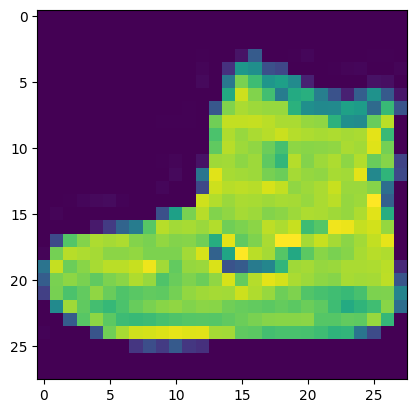

In [5]:
import numpy as np

np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [6]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [7]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [8]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.7847 - loss: 0.6262
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8629 - loss: 0.3851
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8758 - loss: 0.3358
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.8816 - loss: 0.3209
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8898 - loss: 0.2979


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8724 - loss: 0.3503


[0.34997349977493286, 0.8708999752998352]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises:


## Exploration Exercises

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [ ]:
print(test_labels[0])

### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


#### Answer: 

Write your answer here.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


#### Answer: 

Write your answer here.

### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [ ]:
import tensorflow as tf

print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

### Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate

#### Answer: 

Write your answer here.

### Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case?

In [ ]:
import tensorflow as tf

print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        # tf.keras.layers.Flatten(), # We remove Flatter() layer here.
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

#### Answer: 

Write your answer here.

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

In [ ]:
import tensorflow as tf

print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.softmax),
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

#### Answer: 

Write your answer here.

### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

In [ ]:
import tensorflow as tf

print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

#### Answer: 

Write your answer here.